# Random Forest Model Implemented to analysis the Relationship among the data Catergorically

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
import time

In [2]:
import openpyxl 
import os

In [3]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_true)-MinMaxNormal(y_pred))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [5]:
"""
Use Decision Tree to fit the relationship between 
homeless_real_value and other variables, except 
no_longer_homeless, prevention_duty, and relief duty.
"""

#Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2020,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

#social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [6]:
categorical_data.columns

Index(['Local', 'Local_Authority_code', 'Local_Authority_name',
       'Total_owed_a_prevention_or_relief_duty',
       'Threatened_with_homelessness_within_56_days_Prevention_duty_owed',
       'Homeless_Relief_duty_owed4', 'Number_of_households_in_area4(000s)',
       'Total_households_with_support_needs', 'Total_secured_accommodation',
       'Homeless_(including_intentionally_homeless)',
       'Size_of_social_housing_waiting_list_2020', '2020_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Intermediate_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Total_Affordable(Starts_on_Site)', 'Affordable_Rent(Completions)',
       'Social_Rent(Completions)', 'Intermediate_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)',
       'Total_Affordable(Completions)', 'Total(Starts_on_Site)',
       'Total(Completions)', 'Market(Starts_on_Site)', 'Market(Completions)',
       'A_B_property_cou

In [7]:
data_table=categorical_data.drop(labels='Local',axis=1)
data_table=data_table.drop(labels='Local_Authority_code',axis=1)
data_table=data_table.drop(labels='Local_Authority_name',axis=1)
#data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
data_table=data_table.drop(labels='Total_secured_accommodation',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
#data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='C_D_property_counts',axis=1)
#data_table=data_table.drop(labels='E_F_property_counts',axis=1)
#data_table=data_table.drop(labels='G_H_property_counts',axis=1)
#data_table=data_table.drop(labels='median_houses_2020',axis=1)
#data_table=data_table.drop(labels='median_earning_2020',axis=1)
#data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
#data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total(Completions)',axis=1)
#data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
#data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [8]:
feature_space = data_table.iloc[:, data_table.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
feature_class = data_table.iloc[:, data_table.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [9]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 10)

# Cleaning test sets to avoid future warning messages
normal_class_set = class_set
class_set = normal_class_set.values.ravel() 
normal_test_class_set = test_class_set
test_class_set = normal_test_class_set.values.ravel() 

In [10]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)

In [11]:
# Set best parameters given by grid search 
fit_rf = fit_rf.set_params(bootstrap = True,n_estimators = 400,criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 5)

In [12]:
hundredYard_forest = fit_rf.fit(training_set, class_set)

In [13]:
predictions = hundredYard_forest.predict(test_set)

In [14]:
feature_importance_score = list(hundredYard_forest.feature_importances_)

In [15]:
print('SL Model R2 Score: '+str(r2_score(test_class_set,predictions)))

coef = np.corrcoef(test_class_set,predictions)
coef = coef[0,1]
print('SL Model Correlation Coefficient: '+str(coef))

SLMSPE = mean_absolute_percentage_error(test_class_set,predictions)
print('SL Mean Squared Percentage Error: '+str(SLMSPE))

SL Model R2 Score: 0.7310354573385521
SL Model Correlation Coefficient: 0.8829725841711706
SL Mean Squared Percentage Error: 5.164578483530898


In [16]:
socre_data_score = pd.DataFrame(feature_importance_score)
socre_data_score.index = hundredYard_forest.feature_names_in_[:]
socre_data_score = socre_data_score.sort_values(by=[0])

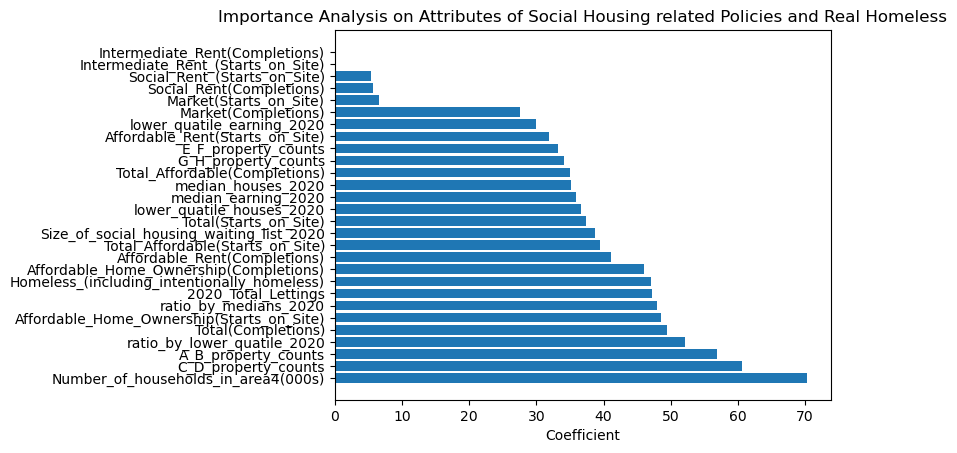

In [17]:

plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score*1000, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/random_forest_importance_score_analysis.png')
plt.show()

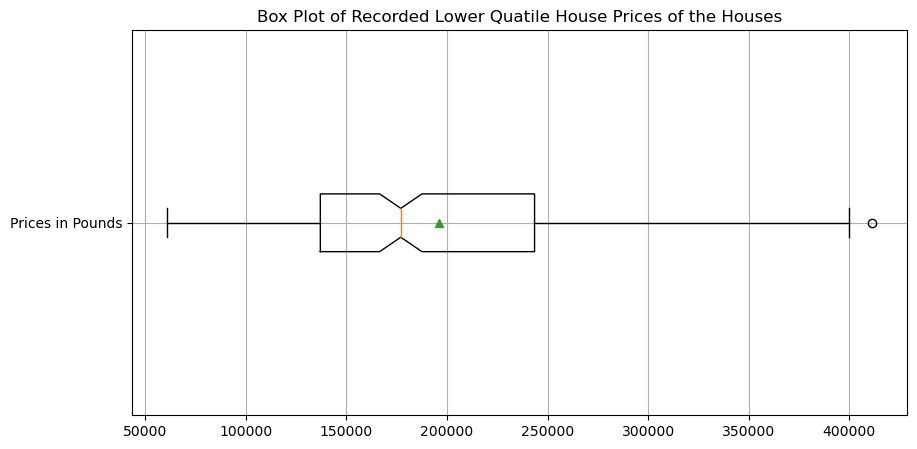

In [18]:
fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Recorded Lower Quatile House Prices of the Houses')
ax_box.boxplot(data_table['lower_quatile_houses_2020'],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Prices in Pounds'])
plt.savefig('Figure/lq_house_prices_data.png')

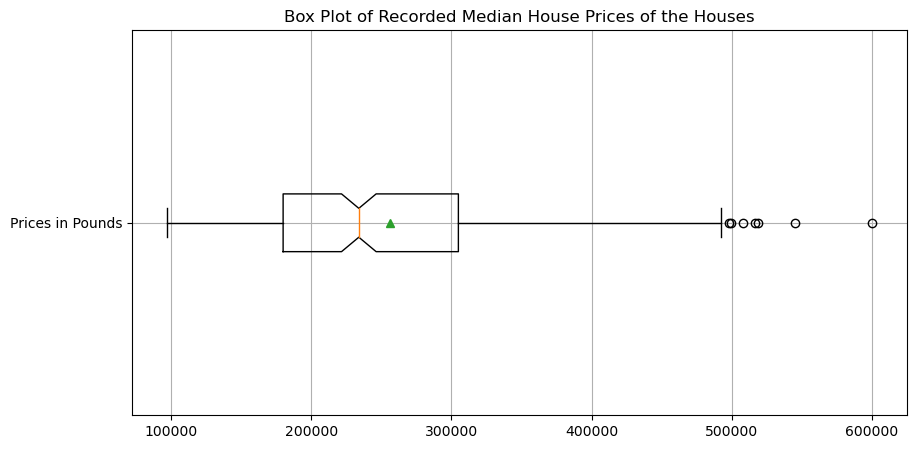

In [19]:
fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Recorded Median House Prices of the Houses')
ax_box.boxplot(data_table['median_houses_2020'],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Prices in Pounds'])
plt.savefig('Figure/median_house_prices_data.png')

In [20]:
feature_importance = pd.DataFrame(feature_importance_score)
feature_importance.columns = ['RF Importance']
feature_importance.index = list(hundredYard_forest.feature_names_in_[:])
cwd = os.getcwd()
feature_importance.to_csv(os.path.join(cwd, "ResultTables/ERIC_example_randome_forest_model_scores.csv"))  

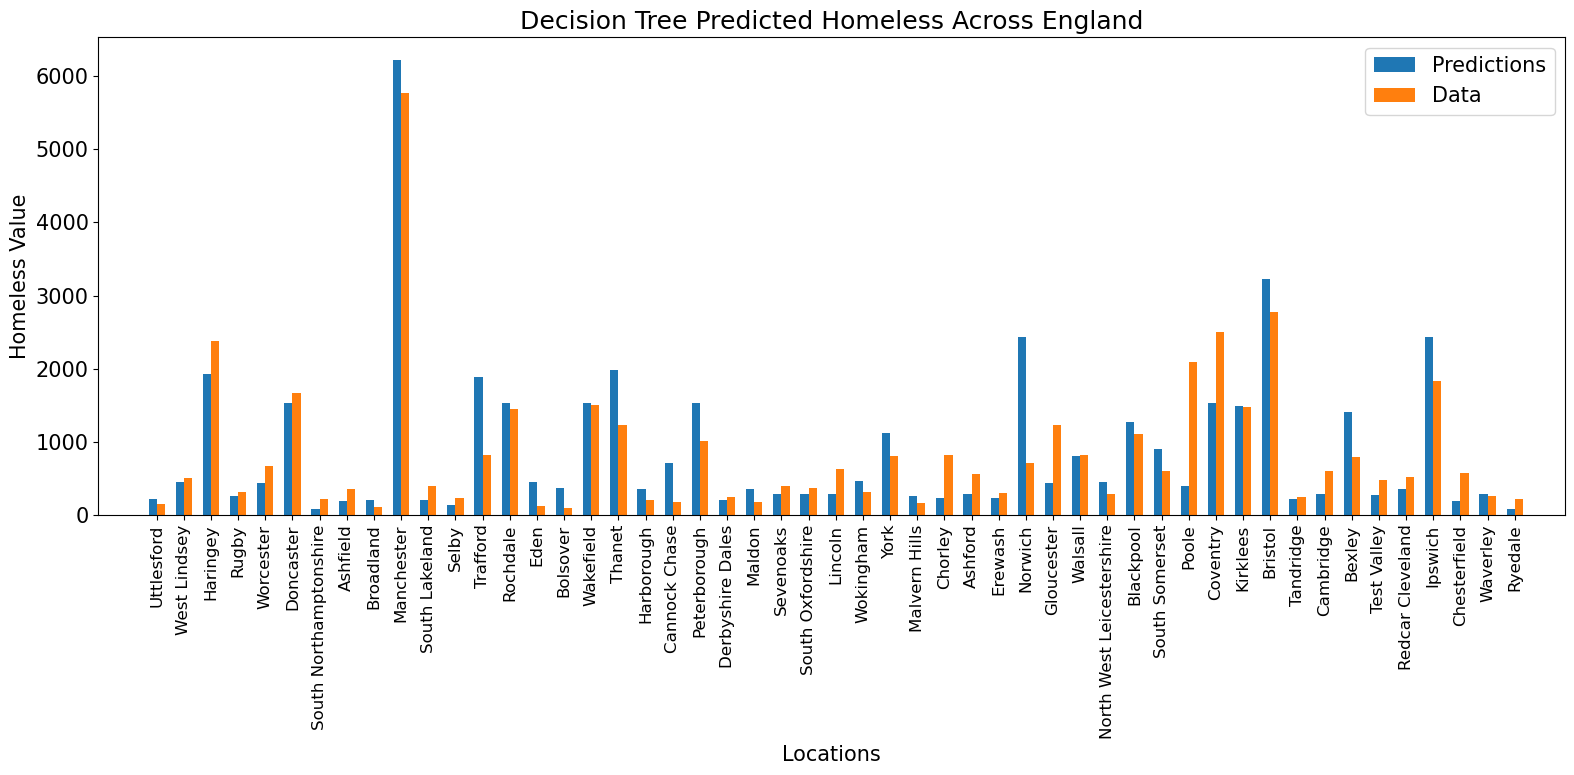

In [21]:
#Plot and save the test results
f_predictions = predictions
test_y = test_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/ERIC_Random_forest_test_result.png')
plt.show()

In [22]:
accuracy_list = []
importance = pd.DataFrame(training_set.columns, columns=["feature"])
features = pd.DataFrame(training_set.columns, columns=["feature"])
loop_fit_rf = RandomForestClassifier(random_state=0)
for i in range(0,20):
    local_training_set, local_test_set, local_class_set, local_test_class_set = train_test_split(feature_space,feature_class,test_size = 0.20,random_state = i)
    # Cleaning test sets to avoid future warning messages
    local_normal_class_set = local_class_set
    local_class_set = local_normal_class_set.values.ravel() 
    local_normal_test_class_set = local_test_class_set
    local_test_class_set = local_normal_test_class_set.values.ravel() 
    
    loop_fit_rf = loop_fit_rf.set_params(n_estimators = 400,criterion = 'entropy',max_features = 'auto',max_depth = 5)
    
    loop_fit_rf.fit(local_training_set, local_class_set)
    local_predictions = loop_fit_rf.predict(local_test_set)
    
    accuracy = r2_score(local_test_class_set,local_predictions)
    accuracy_list.append(accuracy)

    importances_values = loop_fit_rf.feature_importances_
    
    columns_name = "importance" + str(i)
    importances = pd.DataFrame(importances_values, columns=[columns_name])
    importance = pd.concat([importance, importances], axis=1)


    importance = importance.sort_values([columns_name], ascending=True)
    importance[columns_name] = (importance[columns_name]).astype(float)
    importance = importance.sort_values([columns_name])
    
    thisImportance =  pd.concat([features, importances], axis=1)
    
    thisImportance = thisImportance.sort_values([columns_name], ascending=True)
    thisImportance[columns_name] = (thisImportance[columns_name]).astype(float)
    thisImportance = thisImportance.sort_values([columns_name])

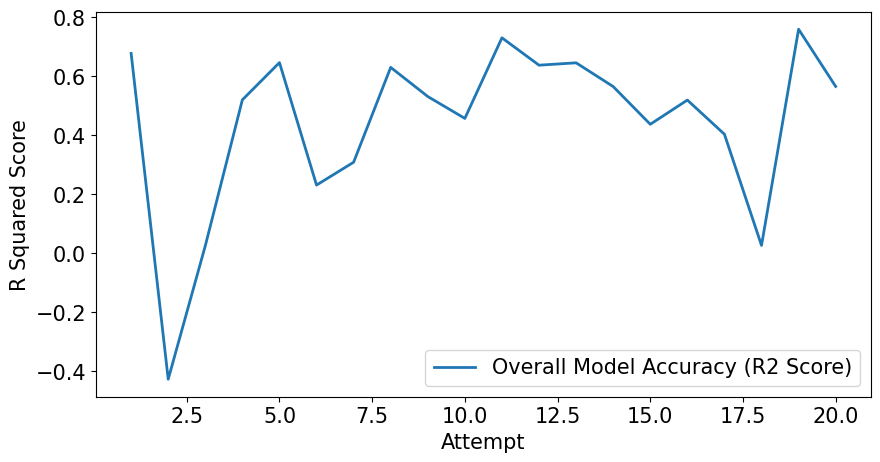

In [23]:
numbering = list(range(1,len(accuracy_list)+1))
plt.rcParams.update({'font.size': 15})
fig3, ax = plt.subplots(figsize=(10,5))
plt.plot(numbering, accuracy_list,linestyle ="-",linewidth=2, label = "Overall Model Accuracy (R2 Score)")
plt.xlabel('Attempt')
plt.ylabel('R Squared Score')
plt.legend(loc=4, prop={'size': 15})
plt.savefig('ERIC_accuracy_random_forest.png',bbox_inches='tight')

In [24]:
importance.index = importance['feature']
importance = importance.drop(labels='feature',axis=1)
average_importance = importance.mean(axis=1)

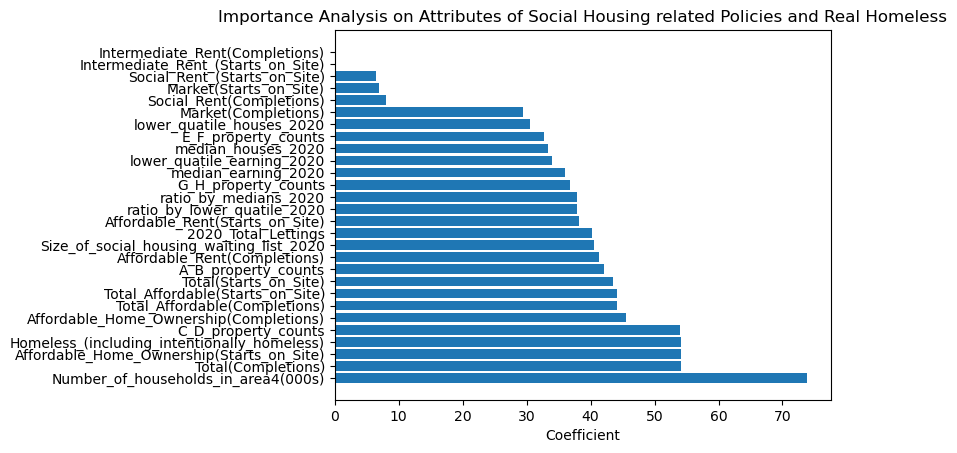

In [25]:
socre_data_score = pd.DataFrame(average_importance*1000)
socre_data_score.index = average_importance.index
socre_data_score = socre_data_score.sort_values(by=[0])
plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/ERIC_overall_random_forest_importance_score_analysis.png',bbox_inches='tight')
plt.show()

In [26]:
feature_importance = pd.DataFrame(average_importance*1000)
feature_importance.columns = ['RF Importance']
feature_importance.index = average_importance.index
cwd = os.getcwd()
feature_importance.to_csv(os.path.join(cwd, "ResultTables/ERIC_overall_randome_forest_model_scores.csv"))  

In [74]:
data_table=categorical_data.drop(labels='Local',axis=1)
data_table=data_table.drop(labels='Local_Authority_code',axis=1)
data_table=data_table.drop(labels='Local_Authority_name',axis=1)
data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
data_table=data_table.drop(labels='Total_secured_accommodation',axis=1)
data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Social_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='Social_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
#data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='C_D_property_counts',axis=1)
#data_table=data_table.drop(labels='E_F_property_counts',axis=1)
#data_table=data_table.drop(labels='G_H_property_counts',axis=1)
#data_table=data_table.drop(labels='median_houses_2020',axis=1)
#data_table=data_table.drop(labels='median_earning_2020',axis=1)
#data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
data_table=data_table.drop(labels='Total(Completions)',axis=1)
#data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
#data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [75]:
data_table.columns

Index(['Total_owed_a_prevention_or_relief_duty',
       'Number_of_households_in_area4(000s)',
       'Size_of_social_housing_waiting_list_2020', '2020_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Affordable_Rent(Completions)', 'Social_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)', 'Market(Starts_on_Site)',
       'Market(Completions)', 'A_B_property_counts', 'C_D_property_counts',
       'E_F_property_counts', 'G_H_property_counts', 'median_houses_2020',
       'median_earning_2020', 'ratio_by_medians_2020',
       'lower_quatile_houses_2020', 'lower_quatile_earning_2020',
       'ratio_by_lower_quatile_2020'],
      dtype='object')

In [77]:
feature_space = 0
feature_class = 0
feature_space = data_table.iloc[:, data_table.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
feature_class = data_table.iloc[:, data_table.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [78]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)

In [61]:
# Run Exhaustive Search for optimal parameters
np.random.seed(0)
start = time.time()

param_dist = {'n_estimators':[400,500,600],'max_depth': [2,3,5],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 3,
                     param_grid=param_dist, 
                     n_jobs = 5)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 400}
Time taken in grid search:  38.31


In [93]:
accuracy_list = []
importance_new = pd.DataFrame(feature_space.columns, columns=["feature"])
features_new = pd.DataFrame(feature_class.columns, columns=["feature"])
loop_fit_rf_new = RandomForestClassifier(random_state=0)

In [94]:
for i in range(0,20):
    local_training_set, local_test_set, local_class_set, local_test_class_set = train_test_split(feature_space,feature_class,test_size = 0.20,random_state = i)
    # Cleaning test sets to avoid future warning messages
    local_normal_class_set = local_class_set
    local_class_set = local_normal_class_set.values.ravel() 
    local_normal_test_class_set = local_test_class_set
    local_test_class_set = local_normal_test_class_set.values.ravel() 
    
    loop_fit_rf = loop_fit_rf.set_params(n_estimators = 400,criterion = 'entropy',max_features = None,max_depth = 5)
    
    loop_fit_rf.fit(local_training_set, local_class_set)
    local_predictions = loop_fit_rf.predict(local_test_set)
    
    accuracy = r2_score(local_test_class_set,local_predictions)
    accuracy_list.append(accuracy)

    importances_values = loop_fit_rf.feature_importances_
    
    columns_name = "importance" + str(i)
    importances_new = pd.DataFrame(importances_values, columns=[columns_name])
    importance_new = pd.concat([importance_new, importances_new], axis=1)


    importance_new = importance_new.sort_values([columns_name], ascending=True)
    importance_new[columns_name] = (importance_new[columns_name]).astype(float)
    importance_new = importance_new.sort_values([columns_name])

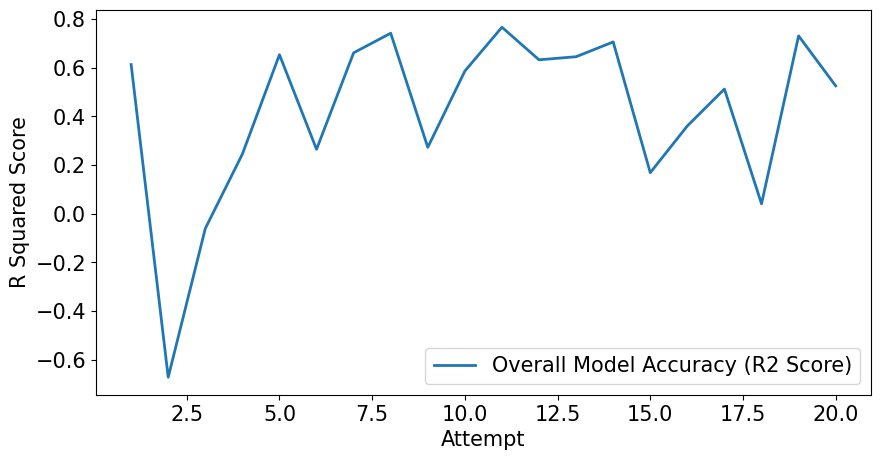

In [95]:
numbering = list(range(1,len(accuracy_list)+1))
plt.rcParams.update({'font.size': 15})
fig3, ax = plt.subplots(figsize=(10,5))
plt.plot(numbering, accuracy_list,linestyle ="-",linewidth=2, label = "Overall Model Accuracy (R2 Score)")
plt.xlabel('Attempt')
plt.ylabel('R Squared Score')
plt.legend(loc=4, prop={'size': 15})
plt.savefig('ERIC_accuracy_random_forest_new.png',bbox_inches='tight')

In [96]:
importance_new.index = importance_new['feature']
importance_new = importance_new.drop(labels='feature',axis=1)
average_importance = importance_new.mean(axis=1)

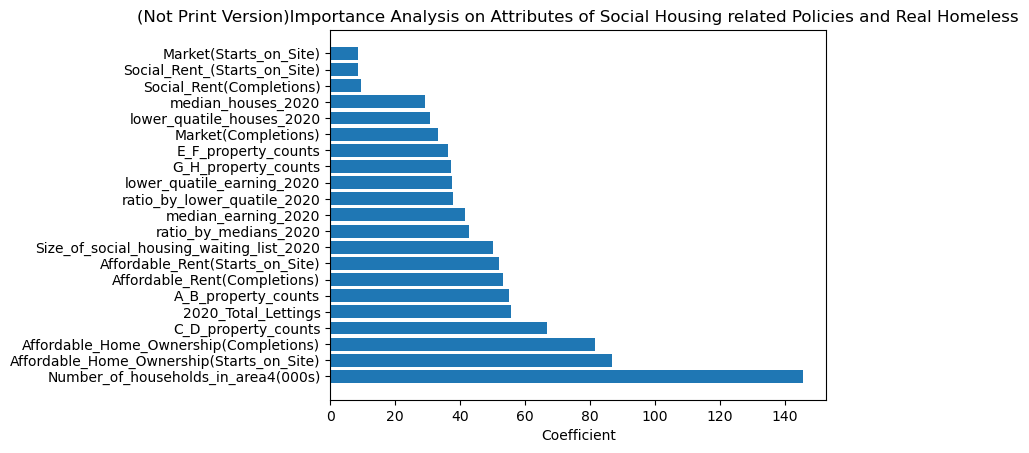

In [97]:
socre_data_score = pd.DataFrame(average_importance*1000)
socre_data_score.index = average_importance.index
socre_data_score = socre_data_score.sort_values(by=[0])
plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('(Not Print Version)Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.show()

In [87]:
average_importance.index = ['Completed Social Rent Affordable Housing', 'Starting Market Supplied Affordable Housing',
       'Starting Social Rent Affordable Housing', 'Median Local House Prices',
       'Number of Houses Valued from \xA388k to \xA3160k by the Council Tax Scheme', 'Lower Quartile Local House Prices',
       'Median Income and House Prices based Housing Affordablity Ratio', 'Lower Quartile Income and House Prices based Housing Affordablity Ratio',
       'Number of Houses Valued Over \xA3160k by the Council Tax Scheme', 'Completed Market Supplied Affordable Housing',
       'Lower Quartile Local Household Annual Income', 'Starting Affordable Rent Housing',
       'Number of Houses Valued from \xA30k to \xA352k by the Council Tax Scheme', 'Median Local Household Annual Income',
       'Competed Affordable Rent Housing',
       'Size of the social housing waiting list by 2020', 'Confirmed Number of Social Housing Let to Households by 2020',
       'Number of Houses Valued from \xA352k to \xA388k by the Council Tax Scheme', 'Starting Affordable Home Ownership Houses',
       'Competed Affordable Home Ownership Houses',
       'Number of Households Recorded in Each Local Authority Council']

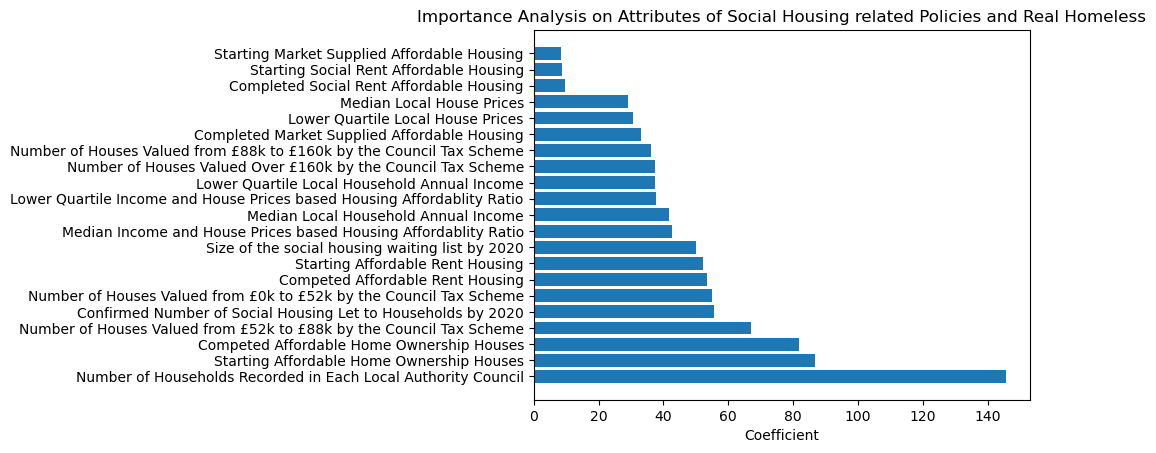

In [89]:
socre_data_score = pd.DataFrame(average_importance*1000)
socre_data_score.index = average_importance.index
socre_data_score = socre_data_score.sort_values(by=[0])
plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/ERIC_new_overall_random_forest_importance_score_analysis.png',bbox_inches='tight')
plt.show()

In [90]:
feature_importance = pd.DataFrame(average_importance*1000)
feature_importance.columns = ['RF Importance']
feature_importance.index = average_importance.index
cwd = os.getcwd()
feature_importance.to_csv(os.path.join(cwd, "ResultTables/ERIC_new_overall_randome_forest_model_scores.csv"))  

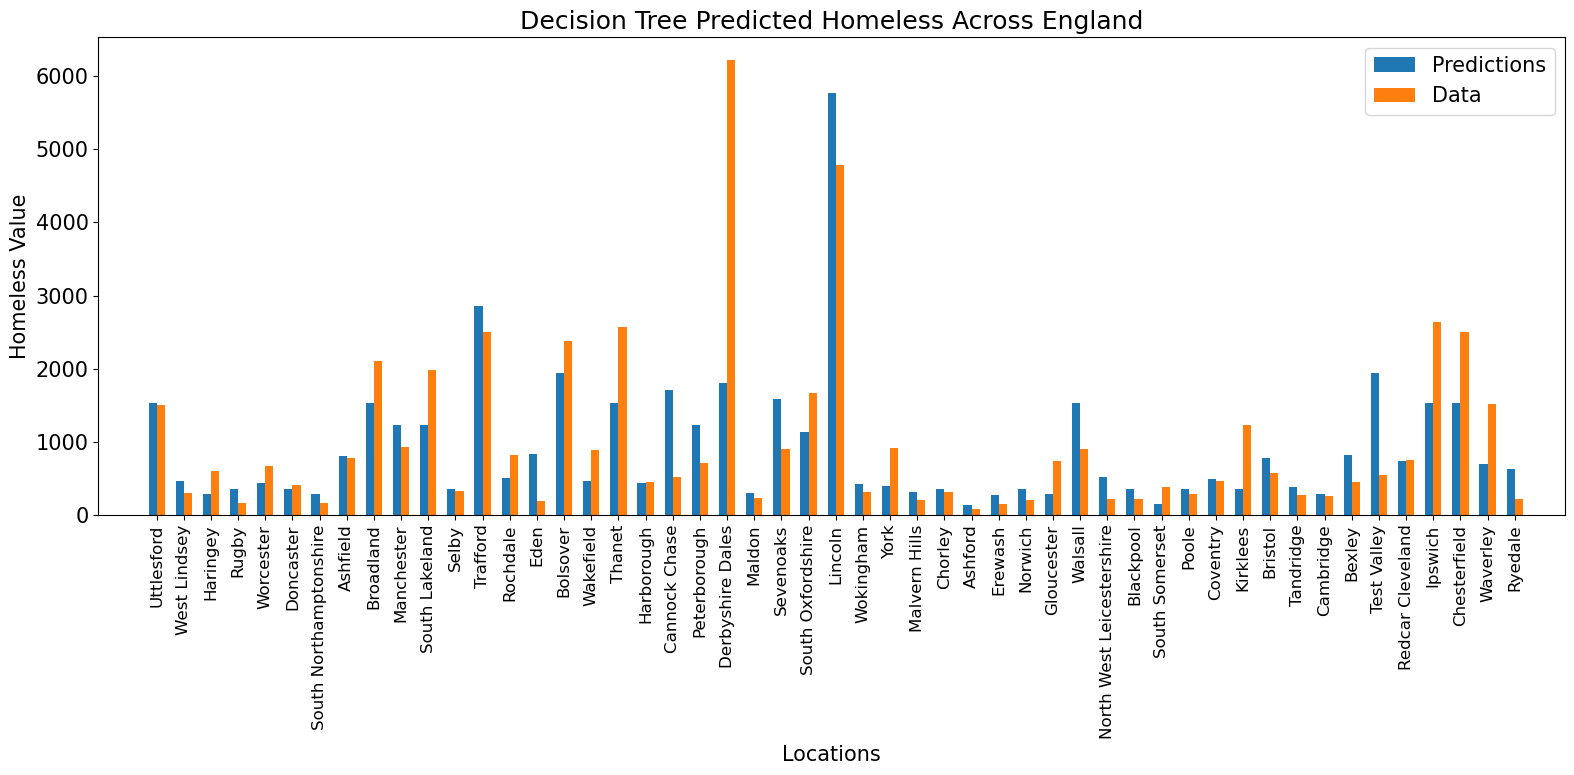

In [91]:
#Plot and save the test results
f_predictions = local_predictions
test_y = local_test_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/ERIC_new_Random_forest_test_result.png')
plt.show()